In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)
import time as timer
%matplotlib inline

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000




# dropping id column

In [7]:
data.drop('id',axis=1,inplace=True)

In [8]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Lets fill Null Values

In [9]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

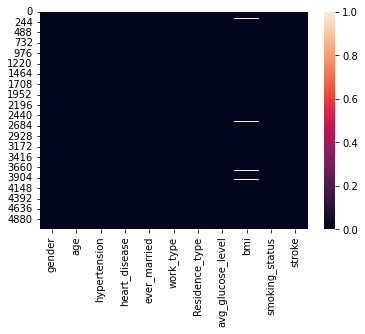

In [10]:
sns.heatmap(data.isnull())

In [11]:
from sklearn.impute import KNNImputer

In [12]:
imputer = KNNImputer(n_neighbors = 5)
data['bmi'] = imputer.fit_transform(data[['bmi']])

In [13]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

<AxesSubplot:>

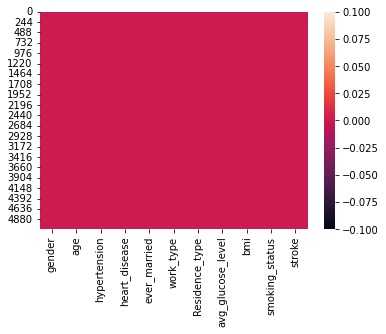

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Outlier removal by iqr method

In [17]:
def outlier_function(data, col_name):
    first_quartile = np.percentile(data[col_name], 25)
    third_quartile = np.percentile(data[col_name], 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [18]:
numerics= data.select_dtypes(include='float64')
for column in numerics.columns:
    if outlier_function(numerics, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data, column)[2], column))

There are 627 outliers in avg_glucose_level
There are 126 outliers in bmi


<AxesSubplot:xlabel='bmi'>

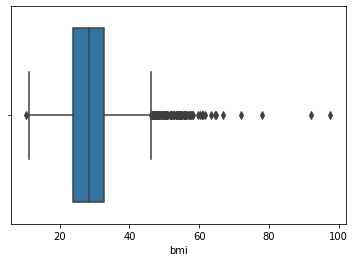

In [19]:
sns.boxplot(x='bmi',data=data)

In [20]:
q1,q3=np.percentile(data['bmi'],[25,75])

In [21]:
q1

23.8

In [22]:
q3

32.8

In [23]:
iqr=q3-q1
iqr

8.999999999999996

In [24]:
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [25]:
lower_limit

10.300000000000006

In [26]:
upper_limit

46.29999999999999

In [27]:
data.drop(data[data['bmi']>upper_limit].index,inplace=True)
data.drop(data[data['bmi']<lower_limit].index,inplace=True)

<AxesSubplot:xlabel='bmi'>

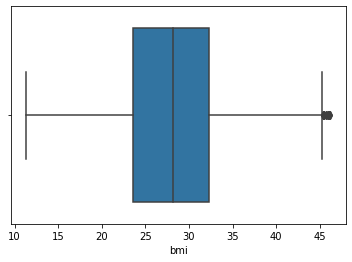

In [28]:
sns.boxplot(x='bmi',data=data)

# Exploratory data analysis

# stroke occurence in gender category 

In [29]:

data["gender"].value_counts()

Female    2895
Male      2088
Other        1
Name: gender, dtype: int64

In [30]:
data = data[data["gender"]!="Other"]

In [31]:
data["gender"].value_counts()

Female    2895
Male      2088
Name: gender, dtype: int64

In [32]:
# stroke occurnence in gender category
data_gender = data.groupby("gender",as_index=False)["stroke"].sum()

In [33]:
data_gender


,gender,stroke
0,Female,138
1,Male,108


# How many married persons get stroke

In [34]:
m=data[(data["ever_married"]=="Yes")& (data["stroke"]==1)].value_counts()
m.sum()

217

# How many unmarreied persons get stroke

In [35]:
nm = data[(data["ever_married"]=="No")& (data["stroke"]==1)].value_counts()
nm.sum()

29

<AxesSubplot:title={'center':'Unmarried-stroke count'}>

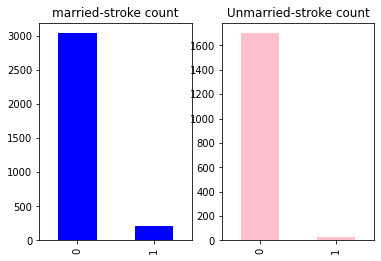

In [36]:
fig,axs = plt.subplots(1,2)
data[(data["ever_married"]=="Yes")].stroke.value_counts().plot(kind="bar",ax=axs[0],color=["blue"],title="married-stroke count")
data[(data["ever_married"]=="No")].stroke.value_counts().plot(kind="bar",ax=axs[1],color=["pink"],title="Unmarried-stroke count")

# persons below age 40 getting a stroke?

In [37]:
data[data["age"]<40].stroke.value_counts()

0    2115
1       8
Name: stroke, dtype: int64

# patients are above 80 years old

In [38]:
data[data["age"]>=80].stroke.value_counts()

0    145
1     40
Name: stroke, dtype: int64

# persons having smoking habit have a stroke

In [39]:
s=data[data["smoking_status"]=="smokes"].stroke.value_counts()

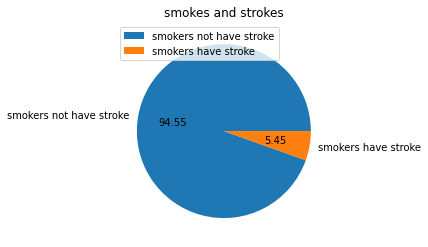

In [40]:
plt.pie(s,autopct="%0.2f",labels=["smokers not have stroke","smokers have stroke"])
plt.title("smokes and strokes")
plt.legend(loc="upper left")
plt.show()


# Visualisation

In [41]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

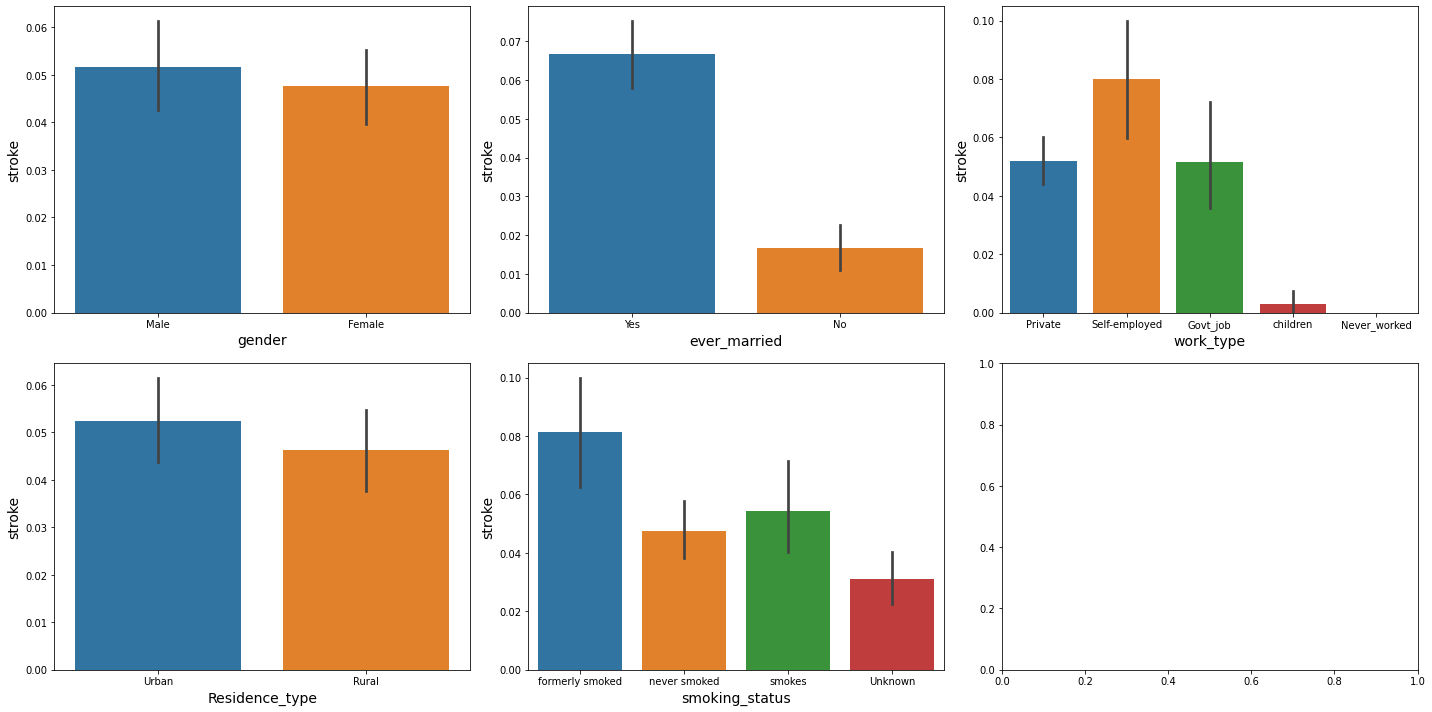

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(data[c], data[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

# label encoding

In [43]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [44]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [45]:
gender=enc.fit_transform(data['gender'])

In [46]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [47]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [48]:
data['work_type']=work_type

C:\Users\dell\AppData\Local\Temp\ipykernel_22512\1988202585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['work_type']=work_type


In [49]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

C:\Users\dell\AppData\Local\Temp\ipykernel_22512\4051687244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ever_married']=ever_married
C:\Users\dell\AppData\Local\Temp\ipykernel_22512\4051687244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Residence_type']=Residence_type
C:\Users\dell\AppData\Local\Temp\ipykernel_22512\4051687244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [50]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4983 non-null   int32  
 1   age                4983 non-null   float64
 2   hypertension       4983 non-null   int64  
 3   heart_disease      4983 non-null   int64  
 4   ever_married       4983 non-null   int32  
 5   work_type          4983 non-null   int32  
 6   Residence_type     4983 non-null   int32  
 7   avg_glucose_level  4983 non-null   float64
 8   bmi                4983 non-null   float64
 9   smoking_status     4983 non-null   int32  
 10  stroke             4983 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 369.8 KB


# UNIVARIATE SELECTION

In [52]:
X=data.iloc[:,:-1]
y=data['stroke']

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4983 non-null   int32  
 1   age                4983 non-null   float64
 2   hypertension       4983 non-null   int64  
 3   heart_disease      4983 non-null   int64  
 4   ever_married       4983 non-null   int32  
 5   work_type          4983 non-null   int32  
 6   Residence_type     4983 non-null   int32  
 7   avg_glucose_level  4983 non-null   float64
 8   bmi                4983 non-null   float64
 9   smoking_status     4983 non-null   int32  
 10  stroke             4983 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 369.8 KB


In [54]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
data.shape

(4983, 11)

In [58]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=6)
ordered_feature=ordered_rank_features.fit(X,y)

In [59]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datacolumns=pd.DataFrame(X.columns)

In [60]:
features_rank=pd.concat([datacolumns,datascores],axis=1)

In [61]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,gender,0.247019
1,age,3644.092231
2,hypertension,76.754906
3,heart_disease,86.561207
4,ever_married,20.755205
5,work_type,3.320460
6,Residence_type,0.498343
7,avg_glucose_level,1613.888057
8,bmi,25.782066
9,smoking_status,3.192697


In [62]:
features_rank.nlargest(6,'Score')

,Features,Score
1,age,3644.092231
7,avg_glucose_level,1613.888057
3,heart_disease,86.561207
2,hypertension,76.754906
8,bmi,25.782066
4,ever_married,20.755205


# Feature Importance

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [64]:
print(model.feature_importances_)

[0.03340936 0.25409995 0.02147772 0.02166401 0.01784709 0.0579252
 0.03907396 0.25247175 0.22092239 0.08110855]



# CORRELATION MATRIX WITH HEATMAP

In [65]:
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026980,0.020910,0.085086,-0.028137,0.053580,-0.006090,0.058051,0.001038,-0.062781,0.009237
age,-0.026980,1.000000,0.279313,0.265582,0.682017,-0.365153,0.014231,0.235397,0.380806,0.270335,0.246698
hypertension,0.020910,0.279313,1.000000,0.112541,0.166837,-0.055192,-0.006756,0.171005,0.157193,0.111654,0.130514
heart_disease,0.085086,0.265582,0.112541,1.000000,0.117005,-0.029852,0.001642,0.168913,0.064572,0.049289,0.135595
ever_married,-0.028137,0.682017,0.166837,0.117005,1.000000,-0.357970,0.005166,0.150888,0.373688,0.265631,0.109595
work_type,0.053580,-0.365153,-0.055192,-0.029852,-0.357970,1.000000,-0.006839,-0.051273,-0.328319,-0.309303,-0.034782
Residence_type,-0.006090,0.014231,-0.006756,0.001642,0.005166,-0.006839,1.000000,-0.001266,0.010086,0.010891,0.014277
avg_glucose_level,0.058051,0.235397,0.171005,0.168913,0.150888,-0.051273,-0.001266,1.000000,0.173060,0.065115,0.130543
bmi,0.001038,0.380806,0.157193,0.064572,0.373688,-0.328319,0.010086,0.173060,1.000000,0.248042,0.057700
smoking_status,-0.062781,0.270335,0.111654,0.049289,0.265631,-0.309303,0.010891,0.065115,0.248042,1.000000,0.027647


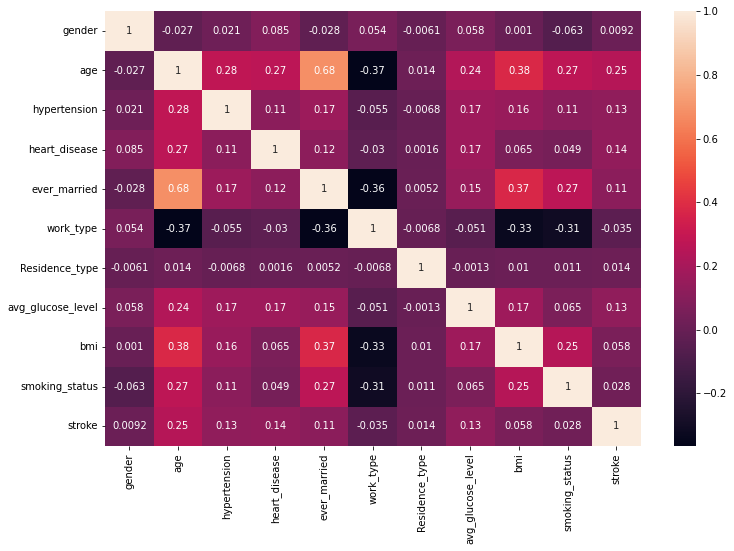

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

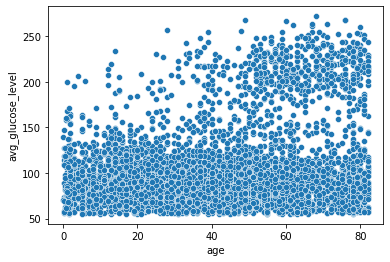

In [67]:
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'])

# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [68]:
X=data.drop('stroke',axis=1)

In [69]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [70]:
Y=data['stroke']

In [71]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4983, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [73]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2452,0,19.0,0,0,0,0,1,133.58,24.0,2
4478,1,40.0,0,0,1,3,0,65.29,28.3,2
1692,0,71.0,0,0,1,2,1,71.38,19.7,2
2716,1,15.0,0,0,0,2,1,77.55,24.8,0
4668,1,44.0,0,0,0,3,1,105.76,32.4,1
...,...,...,...,...,...,...,...,...,...,...
1211,0,79.0,0,0,1,2,0,90.77,22.5,2
3527,0,11.0,0,0,0,4,1,69.68,14.4,0
1380,0,10.0,0,0,0,4,1,112.34,18.1,0
4740,1,60.0,0,0,1,2,0,234.45,36.8,1


In [74]:
Y_train

2452    0
4478    0
1692    0
2716    0
4668    0
       ..
1211    0
3527    0
1380    0
4740    0
1325    0
Name: stroke, Length: 3986, dtype: int64

In [75]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2656,1,46.0,1,0,1,0,1,85.62,33.1,1
3530,0,21.0,0,0,0,2,0,85.86,35.4,0
1500,0,38.0,0,0,1,2,0,81.28,33.2,3
4523,0,43.0,0,0,1,2,1,93.30,32.7,2
4062,0,69.0,0,0,1,2,1,91.65,25.7,1
...,...,...,...,...,...,...,...,...,...,...
2726,0,30.0,0,0,0,2,1,69.67,35.8,1
1108,1,33.0,0,0,1,0,1,82.83,25.4,0
958,1,30.0,0,0,1,2,1,104.62,33.5,3
2622,1,42.0,0,0,1,2,0,110.68,32.4,1


In [76]:
Y_test

2656    0
3530    0
1500    0
4523    0
4062    0
       ..
2726    0
1108    0
958     0
2622    0
5065    0
Name: stroke, Length: 997, dtype: int64

# Normalize

In [77]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,0.419025,43.208260,0.095725,0.055188,0.653221,2.175196,0.509332,105.723143,28.285619,1.373871,0.049368
std,0.493449,22.788234,0.294244,0.228369,0.475992,1.094680,0.499963,44.829867,6.630735,1.073239,0.216657
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.195000,23.600000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.820000,28.200000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.710000,32.300000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,46.200000,3.000000,1.000000


In [78]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [79]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [80]:
import pickle
import os


In [81]:
scaler_path=os.path.join('D:\STROKE PROJECT','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [82]:
X_train_std

array([[-0.85794098, -1.06759996, -0.32744805, ...,  0.61863915,
        -0.65323578,  0.57304515],
       [ 1.16558135, -0.14530341, -0.32744805, ..., -0.89997394,
        -0.00514866,  0.57304515],
       [-0.85794098,  1.21618198, -0.32744805, ..., -0.7645463 ,
        -1.30132291,  0.57304515],
       ...,
       [-0.85794098, -1.46286992, -0.32744805, ...,  0.14631023,
        -1.54247161, -1.29768209],
       [ 1.16558135,  0.73307426, -0.32744805, ...,  2.86175678,
         1.2759538 , -0.36231847],
       [-0.85794098,  1.47969528,  3.05391959, ..., -0.75743023,
         0.67308206,  0.57304515]])

In [83]:
X_test_std

array([[ 1.16558135,  0.11820989,  3.05391959, ..., -0.44788133,
         0.71829744, -0.36231847],
       [-0.85794098, -0.9797622 , -0.32744805, ..., -0.44254428,
         1.06494869, -1.29768209],
       [-0.85794098, -0.23314118, -0.32744805, ..., -0.54439299,
         0.73336923,  1.50840876],
       ...,
       [ 1.16558135, -0.58449225, -0.32744805, ..., -0.02536488,
         0.77858461,  1.50840876],
       [ 1.16558135, -0.05746564, -0.32744805, ...,  0.10939563,
         0.61279488, -0.36231847],
       [-0.85794098, -0.54057336, -0.32744805, ..., -0.3724955 ,
         1.36638457,  0.57304515]])

# Dealing with Class Imbalance with Random oversampling method

In [84]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']

In [85]:
y.value_counts()

0    4737
1     246
Name: stroke, dtype: int64

<AxesSubplot:ylabel='stroke'>

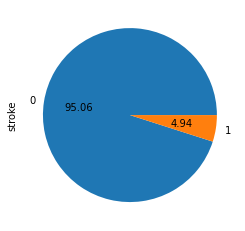

In [86]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

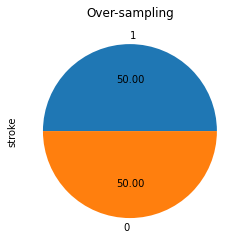

In [87]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [88]:
y_res.value_counts()

1    4737
0    4737
Name: stroke, dtype: int64

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [90]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [91]:
dt.feature_importances_

array([0.03240217, 0.22636132, 0.01331445, 0.0123363 , 0.01529811,
       0.03539451, 0.04699335, 0.32317031, 0.20920762, 0.08552186])

In [92]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [93]:
Y_pred=dt.predict(X_test_std)

In [94]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [97]:
ac_dt

0.9167502507522568

In [98]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(Y_test,Y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       940
           1       0.23      0.19      0.21        57

    accuracy                           0.92       997
   macro avg       0.59      0.58      0.58       997
weighted avg       0.91      0.92      0.91       997



In [99]:
import joblib
model_path=os.path.join('D:\STROKE PROJECT','models/dt.sav')
joblib.dump(dt,model_path)

['D:\\STROKE PROJECT\\models/dt.sav']

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [101]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [102]:
Y_pred_lr=lr.predict(X_test_std)

In [103]:
Y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [104]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [105]:
ac_lr

0.9428284854563691

In [106]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(Y_test,Y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       940
           1       0.23      0.19      0.21        57

    accuracy                           0.92       997
   macro avg       0.59      0.58      0.58       997
weighted avg       0.91      0.92      0.91       997



# KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [108]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [109]:
Y_pred=knn.predict(X_test_std)

In [110]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [111]:
ac_knn

0.9408224674022067

With  1  neighbors the acc is  0.9127382146439318
With  2  neighbors the acc is  0.9398194583751254
With  3  neighbors the acc is  0.9317953861584755
With  4  neighbors the acc is  0.9418254764292878
With  5  neighbors the acc is  0.9398194583751254
With  6  neighbors the acc is  0.9428284854563691
With  7  neighbors the acc is  0.9418254764292878
With  8  neighbors the acc is  0.9428284854563691
With  9  neighbors the acc is  0.9428284854563691
With  10  neighbors the acc is  0.9428284854563691
With  11  neighbors the acc is  0.9428284854563691
With  12  neighbors the acc is  0.9428284854563691
With  13  neighbors the acc is  0.9428284854563691
With  14  neighbors the acc is  0.9428284854563691
With  15  neighbors the acc is  0.9428284854563691
With  16  neighbors the acc is  0.9428284854563691
With  17  neighbors the acc is  0.9428284854563691
With  18  neighbors the acc is  0.9428284854563691
With  19  neighbors the acc is  0.9428284854563691
With  20  neighbors the acc is  0.942828

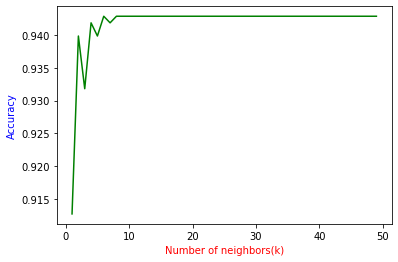

In [112]:
acc=[]
xn=50
for k in range(1,xn):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1 = knn1.fit(X_train,Y_train)
    y_pred=knn1.predict(X_test)
    a= accuracy_score(Y_test,y_pred)
    acc.append(a.mean())
    print('With ',k,' neighbors the acc is ',a)
plt.plot([a for a in range(1,xn)],acc,color='green')
plt.xlabel('Number of neighbors(k)',color='red')
plt.ylabel('Accuracy',color='blue')
print("\n",'The Max acc is achieved at neighbour:\n k=',(acc.index(max(acc))+1))

# SVM

In [113]:
from sklearn.svm import SVC

In [114]:
sv=SVC()

In [115]:
sv.fit(X_train_std,Y_train)

SVC()

In [116]:
Y_pred=sv.predict(X_test_std)

In [117]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [118]:
ac_sv

0.9428284854563691

# NAIVE BAYES

In [119]:
from sklearn.naive_bayes import GaussianNB
NV=GaussianNB()

In [120]:
NV.fit(X_train,Y_train)

GaussianNB()

In [121]:
Y_pred=NV.predict(X_test_std)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [122]:
ac_NV=accuracy_score(Y_test,Y_pred)

In [123]:
ac_NV

0.8525576730190572

In [124]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(Y_test,Y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       940
           1       0.16      0.37      0.22        57

    accuracy                           0.85       997
   macro avg       0.56      0.63      0.57       997
weighted avg       0.91      0.85      0.88       997



In [125]:
Classifier_Accuracy = [ac_dt*100,ac_lr*100,ac_knn*100,ac_sv*100,ac_NV*100]
Classifier_Accuracy

[91.67502507522568,
 94.28284854563691,
 94.08224674022067,
 94.28284854563691,
 85.25576730190572]

<BarContainer object of 5 artists>

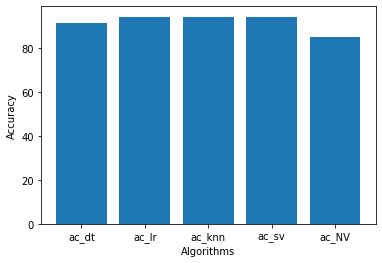

In [126]:
Y=Classifier_Accuracy
X=['ac_dt','ac_lr','ac_knn','ac_sv','ac_NV']
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')

plt.bar(X,Y)